# **Startups Profit Prediction using different regression algorithms**

In the given dataset, R&D Spend, Administration Cost and Marketing Spend of 50 Companies are given along with the profit earned. The target is to prepare an ML model which can predict the profit value of a company if the value of its R&D Spend, Administration Cost and Marketing Spend are given.

i) Construct Different Regression algorithms

ii) Divide the data into train set and test set

iii) Calculate different regression metrics

iv) Choose the best model

Language: Python or R(I choose python here)

DATA SET LINK:
https://drive.google.com/file/d/1Z7RKmScBO7n9vcDIG3Xeo853Ics4QFaF/view

In [ ]:
#importing modules
import pandas as pd
import gdown
import matplotlib.pyplot as pl
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Preparing dataset

In [ ]:
url="https://drive.google.com/uc?id=1Z7RKmScBO7n9vcDIG3Xeo853Ics4QFaF"
output="50_startups.csv"
gdown.download(url,output,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Z7RKmScBO7n9vcDIG3Xeo853Ics4QFaF
To: /content/50_startups.csv
100%|██████████| 1.96k/1.96k [00:00<00:00, 5.16MB/s]


'50_startups.csv'

In [ ]:
df=pd.read_csv("50_startups.csv",header=0) #Reading the file

In [ ]:
print(df.shape) #50 rows and 4 columns

(50, 4)


In [ ]:
df.select_dtypes(include=['int64','float64'])
df.head(10)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# **Exploratory Data Analysis**

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [ ]:
print(f"there are {df.duplicated().sum()} duplicated values in the dataset")

there are 0 duplicated values in the dataset


In [ ]:
correlation_matrix = df.corr()
correlation_matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


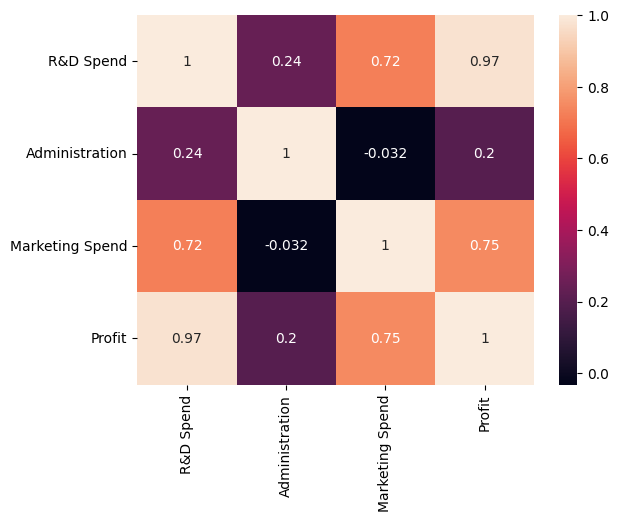

In [ ]:
sb.heatmap(correlation_matrix, annot=True)
pl.show()

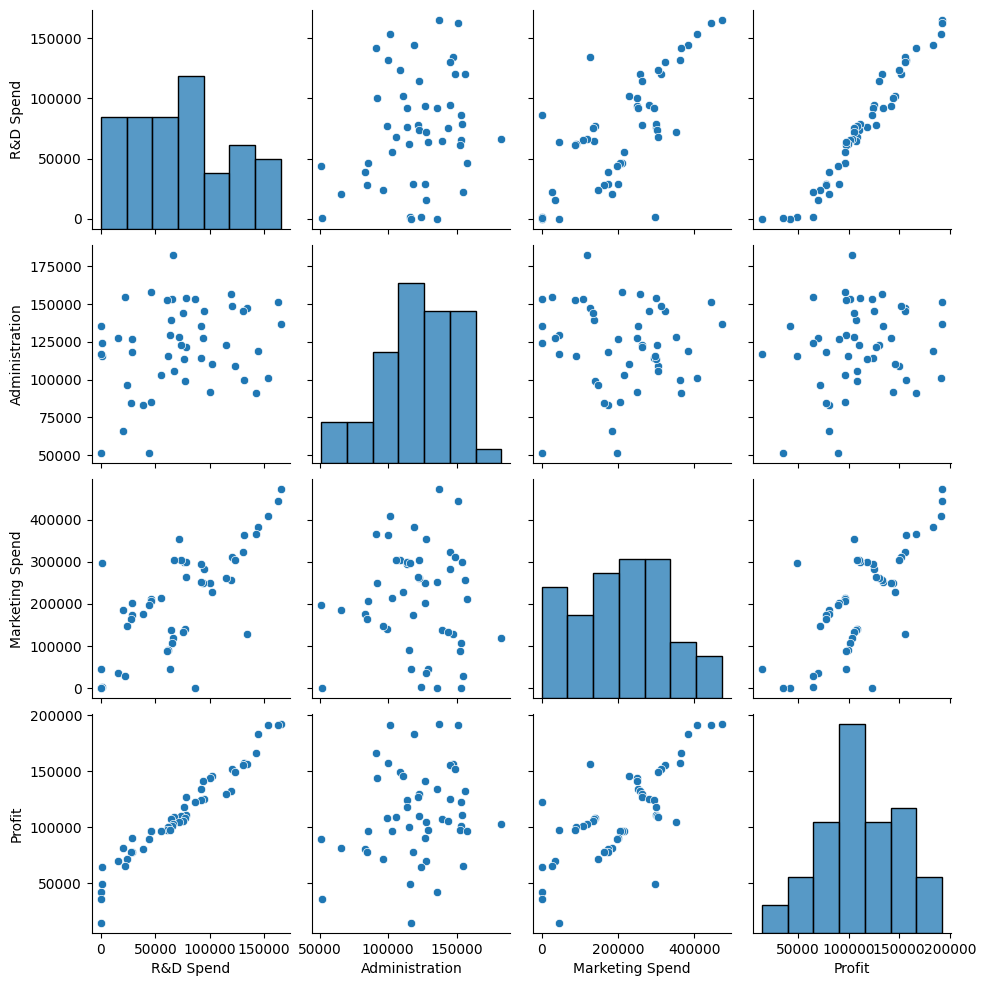

In [ ]:
sb.pairplot(df)
pl.show()

## Preparing features and target

In [ ]:
X=df.iloc[:,:3]
y=df.iloc[:,3:]
print(X.head(5))
print()
print(y.head(5))

   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42

      Profit
0  192261.83
1  191792.06
2  191050.39
3  182901.99
4  166187.94


Feature Scaling(useful when have small
dataset like in this case, we have a dataset having 50 data points)



In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(X)
print(x)

[[ 2.01641149e+00  5.60752915e-01  2.15394309e+00]
 [ 1.95586034e+00  1.08280658e+00  1.92360040e+00]
 [ 1.75436374e+00 -7.28257028e-01  1.62652767e+00]
 [ 1.55478369e+00 -9.63646307e-02  1.42221024e+00]
 [ 1.50493720e+00 -1.07991935e+00  1.28152771e+00]
 [ 1.27980001e+00 -7.76239071e-01  1.25421046e+00]
 [ 1.34006641e+00  9.32147208e-01 -6.88149930e-01]
 [ 1.24505666e+00  8.71980011e-01  9.32185978e-01]
 [ 1.03036886e+00  9.86952101e-01  8.30886909e-01]
 [ 1.09181921e+00 -4.56640246e-01  7.76107440e-01]
 [ 6.20398248e-01 -3.87599089e-01  1.49807267e-01]
 [ 5.93085418e-01 -1.06553960e+00  3.19833623e-01]
 [ 4.43259872e-01  2.15449064e-01  3.20617441e-01]
 [ 4.02077603e-01  5.10178953e-01  3.43956788e-01]
 [ 1.01718075e+00  1.26919939e+00  3.75742273e-01]
 [ 8.97913123e-01  4.58678535e-02  4.19218702e-01]
 [ 9.44411957e-02  9.11841968e-03  4.40446224e-01]
 [ 4.60720127e-01  8.55666318e-01  5.91016724e-01]
 [ 3.96724938e-01 -2.58465367e-01  6.92992062e-01]
 [ 2.79441650e-01  1.15983657e+

Preparing training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.15, random_state=1)
print(x_train.shape,y_train.shape)

(42, 3) (42, 1)


# Applying Some Regression Algorithms

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Importing the metrics

In [ ]:
lr=LinearRegression()
rd=Ridge()
la=Lasso()
kn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
sv=SVR()
rf=RandomForestRegressor()

In [ ]:
def training(reg, x_train, x_test, y_train, y_test):
  reg.fit(x_train,y_train)
  y_pred=reg.predict(x_test)
  r2score = r2_score(y_test,y_pred)
  mse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  return r2score, mae, mse

In [ ]:
regressions={
    "Multiple Linear Regression":lr,
    "Ridge Regression":rd,
    "Lasso Regression":la,
    "K-Nearest Regression":kn,
    "Decision Tree Regression":dt,
    "Support-Vector Regression":sv,
    "Random Forest Regression":rf
}

In [ ]:
i=1
max_r2=0
best_reg=""
print("Results after applying metrics:")
print()
for name, reg in regressions.items():
  r2,mae,mse=training(reg,x_train,x_test,y_train,y_test)
  print(i,"." ,name)
  print("R2 score - ",r2)
  print("MAE - ",mae)
  print("MSE - ",mse)
  print("root-MSE - ",np.sqrt(mse))
  print()
  if r2>max_r2:
    max_r2=r2
    best_reg=name
  i+=1

Results after applying metrics:

1 . Multiple Linear Regression
R2 score -  0.963391196403514
MAE -  8468.36417250894
MSE -  89346386.29423046
root-MSE -  9452.321740939125

2 . Ridge Regression
R2 score -  0.9609531634085541
MAE -  8588.65862846877
MSE -  95296579.0447709
root-MSE -  9761.996673056741

3 . Lasso Regression
R2 score -  0.9633875340643246
MAE -  8469.081928671132
MSE -  89355324.49323732
root-MSE -  9452.79453353543

4 . K-Nearest Regression
R2 score -  0.8534042399993754
MAE -  15797.522749999995
MSE -  357777368.15658534
root-MSE -  18915.003784207533

5 . Decision Tree Regression
R2 score -  0.9154902391611924
MAE -  9388.513749999996
MSE -  206252075.88761246
root-MSE -  14361.478889293137

6 . Support-Vector Regression
R2 score -  1.7735252730854967e-05
MAE -  39305.48364828616
MSE -  2440527767.5358095
root-MSE -  49401.69802279887

7 . Random Forest Regression
R2 score -  0.9466147375280713
MAE -  9579.690137500038
MSE -  130290526.17533928
root-MSE -  11414.4875

In [ ]:
print("After the results, the best regression algorithm we can use for the given data is:")
print(best_reg)

After the results, the best regression algorithm we can use for the given data is:
Multiple Linear Regression


So the best model after applying the metrics is the model used on Multiple Linear Regression

In [ ]:
lr.score(x_train,y_train) # training score

0.9456352749135979

In [ ]:
lr.score(x_test, y_test) # testing score

0.963391196403514

In [ ]:
lr.score(x,y) # overall score

0.9500513168894814

Improving the model based on the set of values taken on train and test sets

This method takes several values of random_state to make several versions of training and testing data to make the model and then we find out the R2 score for each of the model

In [ ]:
values=[]
for i in range(1000):
  x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.15, random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  values.append(r2_score(y_test,y_pred))

Checking the maximum R2 score we got

In [ ]:
print(max(values))
print(values.index(max(values)))

0.9970720083848987
815


In [ ]:
#previously ran test: 0.9975 at 9340

New model based on random_state=815

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.15, random_state=815)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.9970720083848987


In [ ]:
#Applying metrics

print("MAE - ",mean_absolute_error(y_test,y_pred))
print("MSE - ",mean_squared_error(y_test,y_pred))
print("root-MSE - ",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE -  2101.174645558871
MSE -  6033671.603840623
root-MSE -  2456.353314130649


In [ ]:
lr.score(x,y)

0.950733127693669

Model score and model R2 score on training data are significantly lower than R2 score on testing data. This might lead to model get overfit on certain values

In [ ]:
y_predtrain=lr.predict(x_train)
print(r2_score(y_train,y_predtrain)) #value significantly less than what we got on testing data

0.9370172862374727


To resolve this, we run the same when finding the maximum R2 score, instead we find out the minimum of difference between R2 score at testing data and R2 score at training data

In [ ]:
values=[]
for i in range(1000):
  x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.15, random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  y_pred=lr.predict(x_test)
  y_predtrain=lr.predict(x_train)
  values.append(abs(r2_score(y_test,y_pred)-r2_score(y_train,y_predtrain)))

Value found at random state=915

In [ ]:
print(values.index(min(values)))

915


New model based on new random_state value

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.15, random_state=915)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_predtrain=lr.predict(x_train)
print("R2 score on testing side - ",r2_score(y_test,y_pred))
print("R2 score on training side - ",r2_score(y_train,y_predtrain)) #almost same so the model will less likely to overfit and will respond to most of variance

R2 score on testing side -  0.9501874194075972
R2 score on training side -  0.9500851944808688


Applying Metrics

In [ ]:
print("Mean Absolute error - ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error - ",mean_squared_error(y_test,y_pred))
print("root-MSE - ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute error -  6218.455393116013
Mean Squared Error -  51211581.79358857
root-MSE -  7156.226784667222


Final scores:

In [ ]:
print("Final scores of the improved model : ")
print("\nModel score on training side : ",lr.score(x_train,y_train))
print("Model score on testing side : ",lr.score(x_test,y_test))
print("Overall model score on entire data : ",lr.score(x,y))
print("In percentage : ",round(lr.score(x,y)*100, 2),"%")

Final scores of the improved model : 

Model score on training side :  0.9500851944808688
Model score on testing side :  0.9501874194075972
Overall model score on entire data :  0.9501827629152241
In percentage :  95.02 %


Regression Plot to compare predicted and actual data

<Axes: xlabel='predicted', ylabel='actual'>

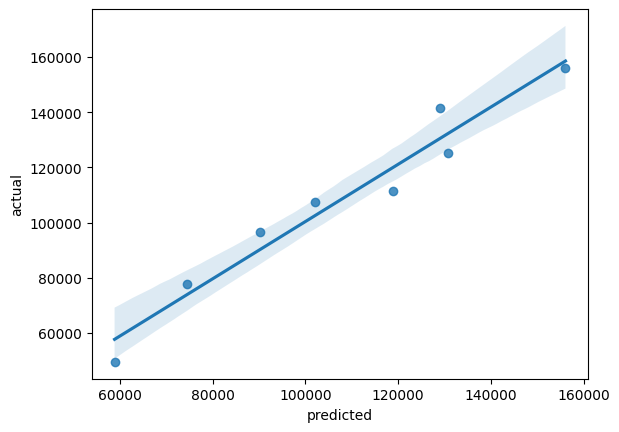

In [ ]:
data = pd.DataFrame({'predicted': y_pred.squeeze(), 'actual': y_test.squeeze()})
sb.regplot(x="predicted",y="actual",data=data)

To test this model, we need to feature scale that values first before we put those values in the model

In [ ]:
a=sc.transform([[144372.41,	118671.85,	383199.62	]])
print(a)

[[ 1.55478369 -0.09636463  1.42221024]]


In [ ]:
lr.predict(a)

array([[173355.78970164]])

# Final Note:

While this model has slightly less R2 score(compared to previous one), this model has almost same values of R2 score on training data and as well as of testing data, which is better because this model will less likely to overfit compared to  previous one.